In [22]:
cd Documents\Github\La_Jara\GW-Hyporheic\Spring2022Hyporheic

C:\Users\nicol\Documents\Github\La_Jara\GW-Hyporheic\Spring2022Hyporheic


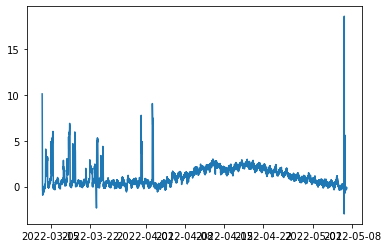

In [23]:
# Preparing the data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Import Data
#depth = pd.read_csv('P2-C_SUMMER2022.csv').iloc[802:4215]
depth = pd.read_csv('P2-C_Spring2022.csv')
depth = depth[1147:6380]

#formatting the date column
from datetime import datetime as dt

date = []
for fecha in depth['Time']:
    date_time_obj = dt.strptime(fecha, '%m/%d/%Y %H:%M')
    date.append(date_time_obj)
new_dates = pd.DataFrame(date)
depth['Date'] = date


plt.plot(depth['Date'], depth['Real'])
#Variable name for spring 2022 is "real"

In [24]:
# Function that removes outliers!! 
def remove_outliers(df, column):
    mean = np.mean(df[column])
    std = np.std(df[column])
    
    outliers = []
    for i, value in enumerate(df[column]):
        z_score = (value - mean) / std
        if abs(z_score) > 3:
            outliers.append(i)
    
    df.drop(df.index[outliers], inplace=True)
    return df

depth = remove_outliers(depth, "Real")

In [25]:
# Exponentially weighted (EW) calculations 
depth['smooth']=depth['Real'].ewm(alpha=0.1).mean()

In [26]:
# Gaussian Smoothing
from scipy.ndimage.filters import gaussian_filter1d

def gaussian_smoothing(arr, sigma):
    return gaussian_filter1d(arr, sigma)

depth["smooth"] = gaussian_smoothing(depth["smooth"], 40)


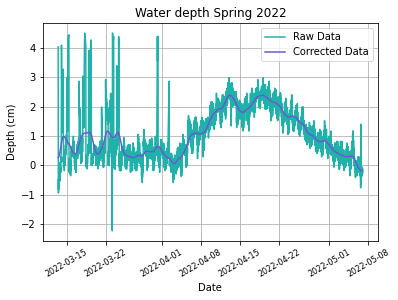

In [28]:
# Plot to see how it looks
plt.plot(depth['Date'], depth['Real'], label='Raw Data', color='lightseagreen')
plt.plot(depth['Date'], depth['smooth'], label='Corrected Data', color='slateblue')
plt.title('Water depth Spring 2022')
plt.xlabel("Date")
plt.xticks(rotation=30, fontsize=8)
plt.ylabel("Depth (cm)")
plt.legend()
plt.grid()

# Save smoothed depths to CSV
depth.to_csv("Spring2022_SmoothedDepth.csv", index=False)
plt.savefig("spring2022_depth.png", dpi=300, bbox_inches="tight")